In [4]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14) # x轴和y轴的字体大小
mpl.rc('xtick', labelsize=12) # 刻度标签字体大小
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# The Normal Equation

In [8]:
import numpy as np
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1) #是从标准正态分布中返回一个或多个样本值。

Saving figure generated_data_plot


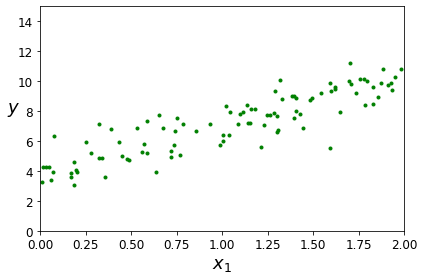

In [13]:
# 根据作者代码练习此部分
plt.plot(X, y, "g.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15]) #[xmin, xmax, ymin, ymax]
save_fig("generated_data_plot")
plt.show()

In [14]:
X_b = np.c_[np.ones((100,1)),X] #设置x0=1
#inv矩阵求逆，dot内积
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [15]:
theta_best

array([[3.92335662],
       [3.14149032]])

In [16]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new] # c_按行（放右边），r_按列（放下边）
X_new_b

array([[1., 0.],
       [1., 2.]])

In [17]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.92335662],
       [10.20633726]])

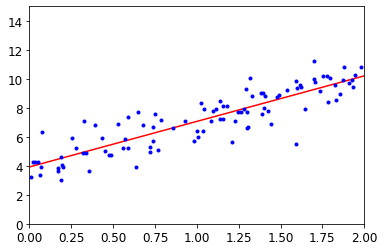

In [18]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

Saving figure linear_model_predictions_plot


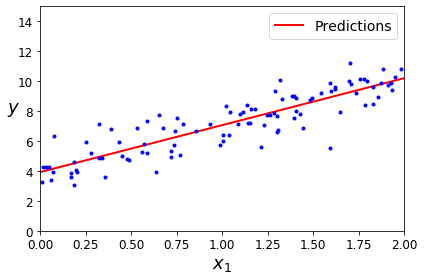

In [20]:
'''
 loc:图例位置，可取(‘best’, ‘upper right’, ‘upper left’, ‘lower left’, 
‘lower right’, ‘right’, ‘center left’, ‘center , right’, ‘lower center’, 
‘upper center’, ‘center’) ；若是使用了bbox_to_anchor，则这项就无效了
'''
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14) # 设置label位置
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()